In [37]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [38]:
df = pd.read_csv('data/fake_users_data.csv', index_col=0)

In [39]:
routes_dictionary ={'Arbres monumentals i singulars':0,
                    'Arbres: La volta al món':1,
                    'Arbres: Els indians':2,
                    'Arbres: Un passeig per l’Albereda':3,
                    'Arbres: Un viatge pel Mediterrani':4,
                    'Ruta Carrer Russafa - la Llotja':5,
                    'Contes Blasco Ibañez – Ruta 1':6,
                    'Contes Blasco Ibañez – Ruta 2':7,
                    'Entre Naranjos':8,
                    'Glorieta-Santa Catalina':9,
                    'Jardins del Reial - Glorieta':10,
                    'La barraca':11,
                    'Ruta Cultural Anell Ciclista':12,
                    'Ruta de la Seda':13,
                    "Ruta dels Pecats a l'entorn del Mercat Central":14,
                    'Ruta pel Centre Històric':15,
                    "Ruta recinte enmurallat d'època islàmica":16,
                    'Ruta València amb bicicleta':17,
                    'Sant Agustí – Pont de Fusta':18,
                    'Sant Agustí - Portal Nou':19,
                    'Serrans - Palau de la Generalitat':20,
                    'Torres de Quart - Temple':21,
                    "Trinitat - L'Almodí":22,
                    'Ruta Valencia en la Memòria':23,
                    'No hay ruta':24}

In [40]:
df['route_id'] = df['route'].map(routes_dictionary)

In [41]:
df = pd.get_dummies(df, prefix=['age', 'gender', 'type', 'diff', 'comp', 'trans'], columns=['age', 'gender', 'type_route', 'difficulty','accompaniment', 'transport'])

In [42]:
X = df.drop(columns=['route', 'route_id'], axis=1)
y = df[['route_id']]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
rnd_clf = RandomForestClassifier(n_estimators=500,
                                 max_leaf_nodes=16,
                                 random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

C:\Users\Paris\AppData\Local\Temp\ipykernel_8896\2477965460.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rnd_clf.fit(X_train, y_train)


In [45]:
y_pred_rf

array([ 1, 22,  7, ...,  0, 22,  8], dtype=int64)

In [46]:
accuracy_score(y_test, y_pred_rf)

0.6658333333333334

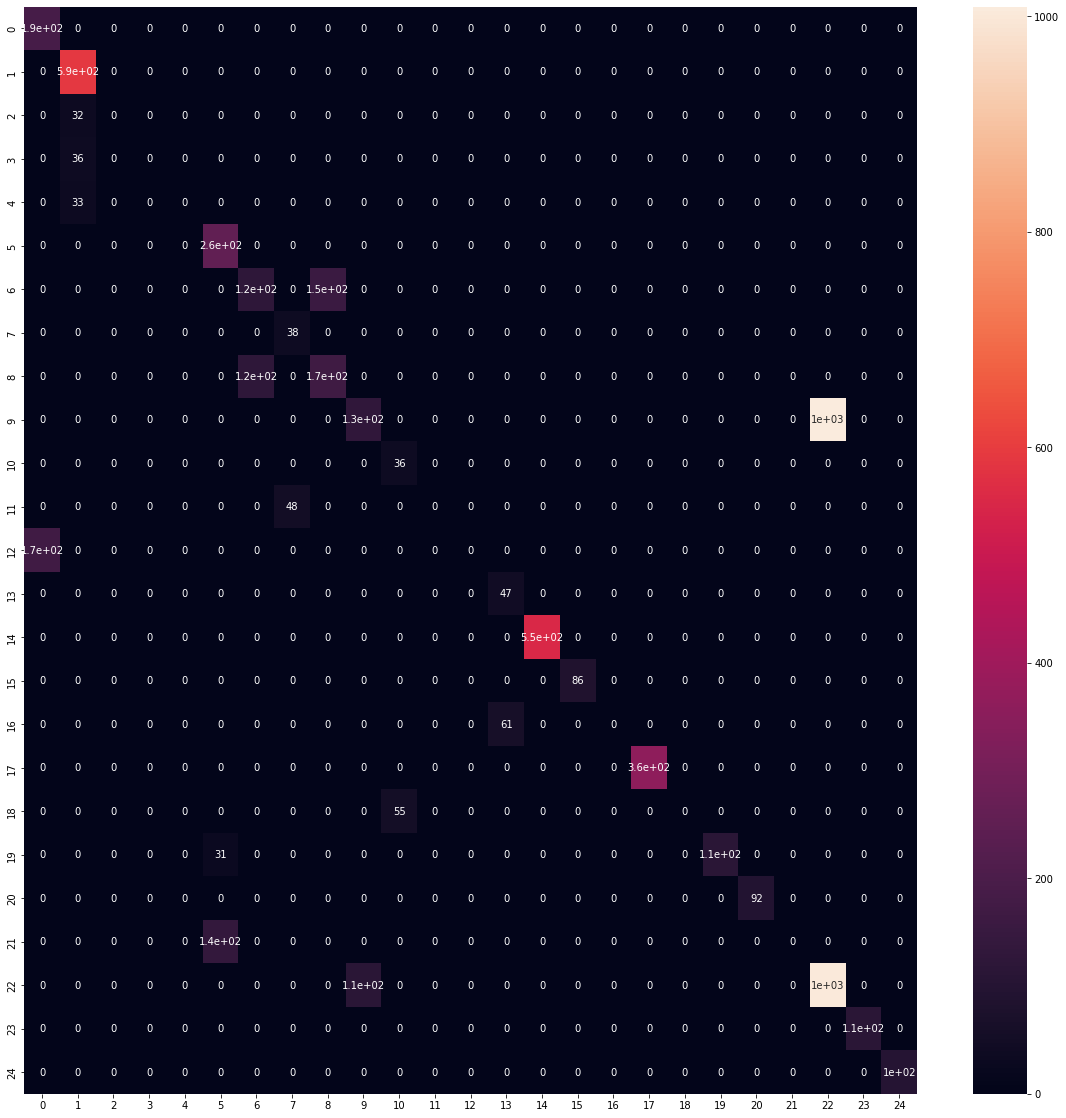

In [47]:
plt.figure(figsize=(20,20))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True);

In [48]:
# Guardar modelo
filename = 'model/finished_model.pkl'
with open(filename, 'wb') as archivo_salida:
    pickle.dump(rnd_clf, archivo_salida)